In [ ]:
import requests
import pandas as pd
import textwrap  # Import textwrap for formatting text

# Function to fetch data from Alpha Vantage
def fetch_stock_data(api_key, function, symbol, interval=None, outputsize=None):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': function,
        'symbol': symbol,
        'apikey': api_key
    }
    if interval:
        params['interval'] = interval
    if outputsize:
        params['outputsize'] = outputsize

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return {'error': 'Unable to fetch data. Check your API key or parameters.'}

# Your API key
api_key = 'OAFM0SUFFD4P7RGW'

# User input for stock symbol
symbol = input("Enter the stock symbol (e.g., NVDA for NVIDIA): ").strip().upper()

# Fetching stock data
print("Fetching stock data...")

# Intraday data
intraday_data = fetch_stock_data(api_key, function='TIME_SERIES_INTRADAY', symbol=symbol, interval='5min')
intraday_df = pd.DataFrame(intraday_data.get('Time Series (5min)', {})).transpose()

# Daily historical data
daily_data = fetch_stock_data(api_key, function='TIME_SERIES_DAILY', symbol=symbol, outputsize='full')
daily_df = pd.DataFrame(daily_data.get('Time Series (Daily)', {})).transpose()

# Stock overview
overview_data = fetch_stock_data(api_key, function='OVERVIEW', symbol=symbol)
overview_df = pd.DataFrame([overview_data])

# Merging the symbol, name, and description into the overview DataFrame
overview_df['Stock Symbol'] = symbol
overview_df = overview_df[['Symbol', 'Name', 'Description']]

Name = overview_df['Name'][0]
Description = overview_df['Description'][0]
symbol = overview_df['Symbol'][0]

# Format the Description as a paragraph
wrapped_description = "\n".join(textwrap.wrap(Description, width=80))

print("----------------------------------")
print(f"You have chosen {Name} ({symbol}):")
print("----------------------------------")
print(wrapped_description)
print("----------------------------------")


Enter the stock symbol (e.g., NVDA for NVIDIA): NVDA
Fetching stock data...
----------------------------------
You have chosen NVIDIA Corporation (NVDA):
----------------------------------
Nvidia Corporation is an American multinational technology company incorporated
in Delaware and based in Santa Clara, California. It designs graphics processing
units (GPUs) for the gaming and professional markets, as well as system on a
chip units (SoCs) for the mobile computing and automotive market.
----------------------------------


In [ ]:
# Predefined stock symbols
stocks = ['AMZN', 'GOOG', 'META', 'ORCL','']

# Dictionary to hold DataFrames for comparison
stock_dataframes = {}

# Fetch daily and overview data for predefined stocks
for stock in stocks:
    print(f"Fetching data for {stock}...")

    # Daily historical data
    daily_data = fetch_stock_data(api_key, function='TIME_SERIES_DAILY', symbol=stock, outputsize='full')
    daily_df = pd.DataFrame(daily_data.get('Time Series (Daily)', {})).transpose()
    daily_df.index = pd.to_datetime(daily_df.index)
    daily_df.sort_index(inplace=True)

    # Stock overview
    overview_data = fetch_stock_data(api_key, function='OVERVIEW', symbol=stock)
    overview_df = pd.DataFrame([overview_data])

    # Save DataFrames in the dictionary
    stock_dataframes[stock] = {
        'daily_data': daily_df,
        'overview_data': overview_df
    }

# Output confirmation
print("Data fetching completed for user input and predefined stocks.")

# Prepare DataFrames
amzn_daily = stock_dataframes['AMZN']['daily_data']
amzn_overview = stock_dataframes['AMZN']['overview_data']

goog_daily = stock_dataframes['GOOG']['daily_data']
goog_overview = stock_dataframes['GOOG']['overview_data']

meta_daily = stock_dataframes['META']['daily_data']
meta_overview = stock_dataframes['META']['overview_data']

orcl_daily = stock_dataframes['ORCL']['daily_data']
orcl_overview = stock_dataframes['ORCL']['overview_data']

Fetching data for AMZN...
Fetching data for GOOG...
Fetching data for META...
Fetching data for ORCL...
Fetching data for ...
Data fetching completed for user input and predefined stocks.


In [ ]:
# In ipython-input-5-e7a453687585.py, add this import
import pandas as pd

# In ipython-input-6-e7a453687585.py, replace the code with this:
# Prepare the daily historical prices dataframe:
# Assuming you want to plot for a specific stock, e.g., AMZN
# First ensure daily_df is assigned to a valid DataFrame.
# If it's from the stock_dataframes dictionary:

#Choose a stock from the stock_dataframes
stock_to_plot = "AMZN" # Change to 'GOOG', 'META', or 'ORCL' if needed
daily_df = stock_dataframes[stock_to_plot]['daily_data']

# Now you can proceed with your data manipulation
daily_df['4. close'] = pd.to_numeric(daily_df['4. close'], errors='coerce')

daily_df.index = pd.to_datetime(daily_df.index)

daily_df = daily_df.sort_index()

daily_df = daily_df.loc['2019-12-01':]

In [ ]:
#Prepare the daily historical prices dataframe:
daily_df['4. close'] = pd.to_numeric(daily_df['4. close'], errors='coerce')

daily_df.index = pd.to_datetime(daily_df.index)

daily_df = daily_df.sort_index()

daily_df = daily_df.loc['2019-12-01':]

In [ ]:
#Prepare the Intraday Dataframe:
intraday_df['4. close'] = pd.to_numeric(intraday_df['4. close'], errors='coerce')

intraday_df.index = pd.to_datetime(intraday_df.index)

In [ ]:
display(daily_df.head())
display(intraday_df.head())

,1. open,2. high,3. low,4. close,5. volume
2019-12-02,1804.4000,1805.5500,1762.6800,1781.60,3931750
2019-12-03,1760.0000,1772.8700,1747.2300,1769.96,3529582
2019-12-04,1774.0100,1789.0900,1760.2200,1760.69,2680700
2019-12-05,1763.5000,1763.5000,1740.0000,1740.48,2827852
2019-12-06,1751.2000,1754.4000,1740.1300,1751.60,3119979


,1. open,2. high,3. low,4. close,5. volume
2024-12-11 19:55:00,138.9300,139.0400,138.9200,138.95,54200
2024-12-11 19:50:00,138.9700,138.9700,138.9100,138.92,43860
2024-12-11 19:45:00,139.0200,139.0300,138.9300,138.97,27858
2024-12-11 19:40:00,139.0100,139.0300,138.9825,139.02,34362
2024-12-11 19:35:00,139.0000,139.0400,139.0000,139.01,15423


In [ ]:
import requests
import pandas as pd


# Function to fetch data from Alpha Vantage
def fetch_stock_data(api_key, function, symbol, interval=None, outputsize=None):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': function,
        'symbol': symbol,
        'apikey': api_key
    }
    if interval:
        params['interval'] = interval
    if outputsize:
        params['outputsize'] = outputsize

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return {'error': 'Unable to fetch data. Check your API key or parameters.'}

# Your API key
api_key = 'OAFM0SUFFD4P7RGW' # Replace with your actual API key

# Predefined stock symbols
stocks = ['AMZN', 'GOOG', 'META', 'ORCL','']

# Dictionary to hold DataFrames for comparison
stock_dataframes = {}

# Fetch daily and overview data for predefined stocks
for stock in stocks:
    print(f"Fetching data for {stock}...")

    # Daily historical data
    daily_data = fetch_stock_data(api_key, function='TIME_SERIES_DAILY', symbol=stock, outputsize='full')
    daily_df = pd.DataFrame(daily_data.get('Time Series (Daily)', {})).transpose()
    daily_df.index = pd.to_datetime(daily_df.index)
    daily_df.sort_index(inplace=True)

    # Stock overview
    overview_data = fetch_stock_data(api_key, function='OVERVIEW', symbol=stock)
    overview_df = pd.DataFrame([overview_data])

    # Save DataFrames in the dictionary
    stock_dataframes[stock] = {
        'daily_data': daily_df,
        'overview_data': overview_df
    }

# Output confirmation
print("Data fetching completed for user input and predefined stocks.")

# Prepare DataFrames
amzn_daily = stock_dataframes['AMZN']['daily_data']
amzn_overview = stock_dataframes['AMZN']['overview_data']

goog_daily = stock_dataframes['GOOG']['daily_data']
goog_overview = stock_dataframes['GOOG']['overview_data']

meta_daily = stock_dataframes['META']['daily_data']
meta_overview = stock_dataframes['META']['overview_data']

orcl_daily = stock_dataframes['ORCL']['daily_data']
orcl_overview = stock_dataframes['ORCL']['overview_data']

# Assuming you want to plot for a specific stock, e.g., AMZN
daily_df = amzn_daily # Assign daily_df to the desired stock's DataFrame
#Prepare the daily historical prices dataframe:
daily_df['4. close'] = pd.to_numeric(daily_df['4. close'], errors='coerce')

daily_df.index = pd.to_datetime(daily_df.index)

daily_df = daily_df.sort_index()

daily_df

Fetching data for AMZN...
Fetching data for GOOG...
Fetching data for META...
Fetching data for ORCL...
Fetching data for ...
Data fetching completed for user input and predefined stocks.


,1. open,2. high,3. low,4. close,5. volume
1999-11-01,68.0600,71.8800,66.3100,69.13,12824100
1999-11-02,69.7500,70.0000,65.0600,66.44,13243200
1999-11-03,68.1900,68.5000,65.0000,65.81,10772100
1999-11-04,67.1900,67.1900,61.0000,63.06,16759200
1999-11-05,64.7500,65.5000,62.2500,64.94,11091400
...,...,...,...,...,...
2024-12-06,220.7500,227.1500,220.6000,227.03,44178069
2024-12-09,227.2100,230.0800,225.6700,226.09,46819363
2024-12-10,226.0900,229.0600,224.2002,225.04,31199864
2024-12-11,226.4100,231.2000,226.2600,230.26,35385785


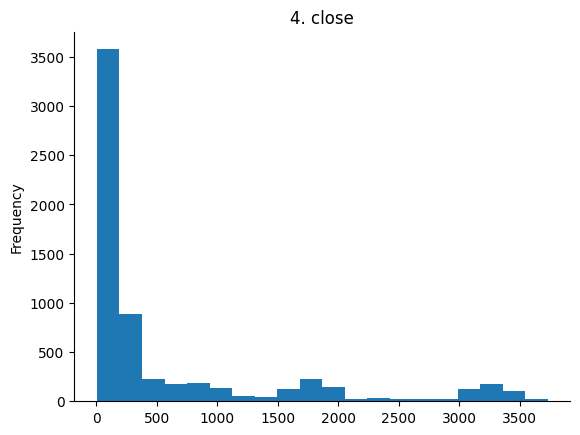

In [ ]:
# @title 4. close

from matplotlib import pyplot as plt
daily_df['4. close'].plot(kind='hist', bins=20, title='4. close')
plt.gca().spines[['top', 'right',]].set_visible(False)

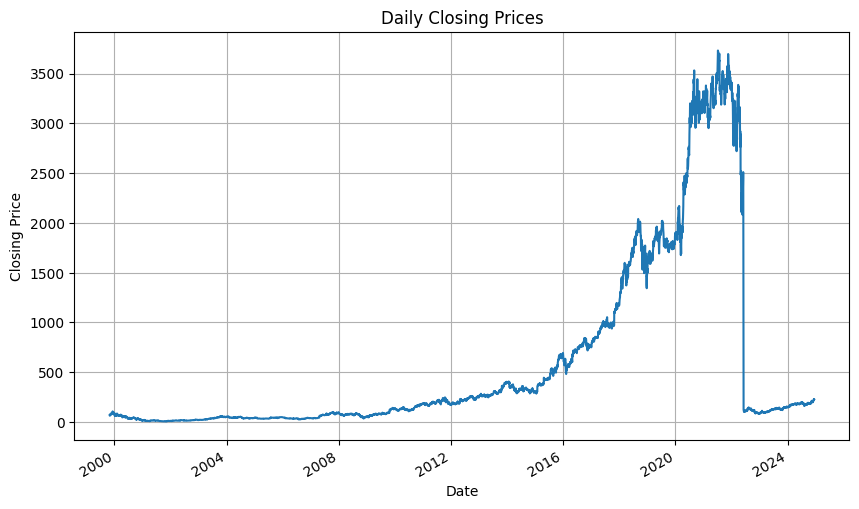

In [ ]:
# prompt: plot.show() dot plot

import matplotlib.pyplot as plt

# Assuming daily_df is your DataFrame with a '4. close' column and a DateTimeIndex
daily_df['4. close'].plot(kind='line', figsize=(10, 6))  # Adjust figsize as needed
plt.title('Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

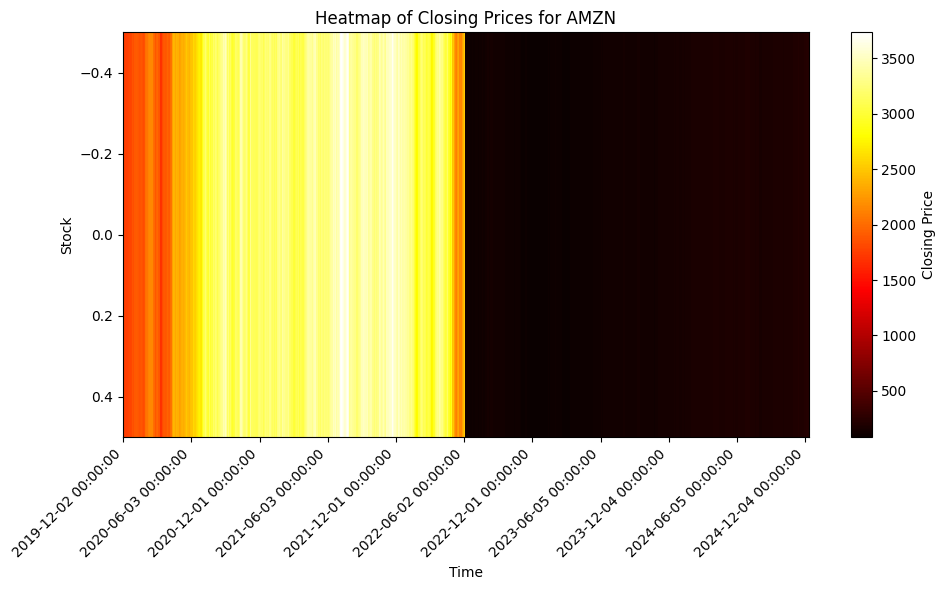

In [ ]:
# prompt: Heat wave chart

import requests
import pandas as pd
import textwrap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ... (Your existing code for fetching data) ...

# Assuming you want to plot for a specific stock, e.g., AMZN
stock_to_plot = "AMZN"  # Change to 'GOOG', 'META', or 'ORCL' if needed
daily_df = stock_dataframes[stock_to_plot]['daily_data']

# Prepare the daily historical prices DataFrame:
daily_df['4. close'] = pd.to_numeric(daily_df['4. close'], errors='coerce')
daily_df.index = pd.to_datetime(daily_df.index)
daily_df = daily_df.sort_index()
daily_df = daily_df.loc['2019-12-01':]  # Filter data


# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.imshow(daily_df[['4. close']].values.reshape(1,-1), cmap='hot', aspect='auto', interpolation='nearest')

# Customize the plot
plt.title(f'Heatmap of Closing Prices for {stock_to_plot}')
plt.xlabel('Time')
plt.ylabel('Stock') # Although we only have one stock, this maintains clarity
plt.colorbar(label='Closing Price')

# Format the x-axis to show dates
# First, get the number of days
num_days = len(daily_df)

# Create an array of indices for the x-axis ticks
x_ticks_indices = [i for i in range(0, num_days, max(1, num_days // 10))] # Adjust the spacing for better visibility
# Now we have to convert the indices back to dates (assuming daily data)
x_ticks_dates = daily_df.index[x_ticks_indices]

# Set the x-axis ticks and labels
plt.xticks(x_ticks_indices, x_ticks_dates, rotation=45, ha="right")


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

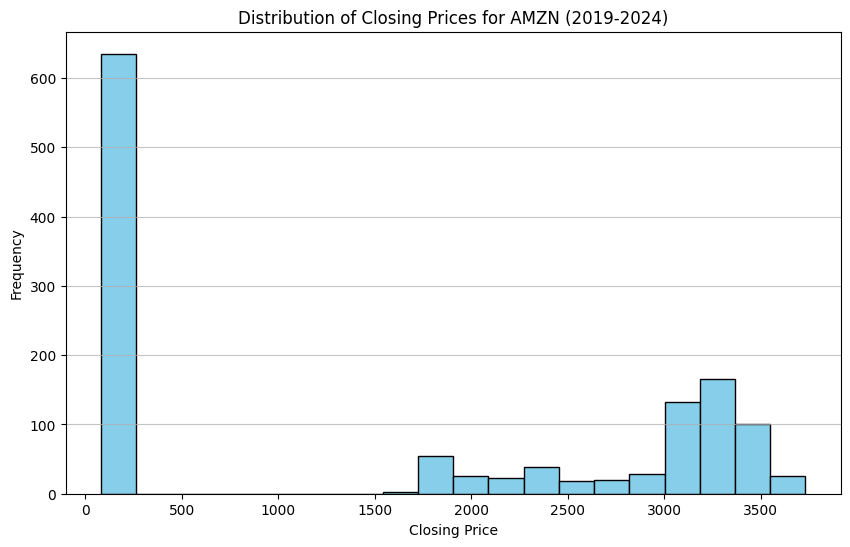

In [ ]:
# prompt: Histogram 2019 - 2024

import matplotlib.pyplot as plt

# Assuming daily_df is your DataFrame with a '4. close' column and a DateTimeIndex
# and it's already filtered for the desired date range ('2019-12-01':)

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(daily_df['4. close'], bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed

# Customize the plot
plt.title(f'Distribution of Closing Prices for {stock_to_plot} (2019-2024)')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

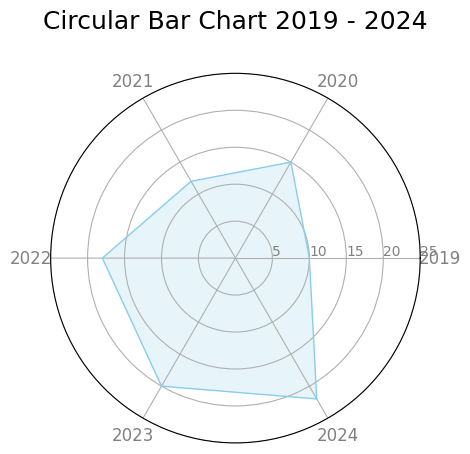

In [ ]:
# prompt: Circular bar chart 2019 - 2024

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
years = [2019, 2020, 2021, 2022, 2023, 2024]
values = [10, 15, 12, 18, 20, 22]  # Example values

# Create the circular bar chart
N = len(years)
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
angles += angles[:1]

values += values[:1]

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], years, color='grey', size=12)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25], ["5","10","15","20","25"], color="grey", size=10)
plt.ylim(0,25)

ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'skyblue')
ax.fill(angles, values, 'skyblue', alpha=0.2)

# Add a title
plt.title('Circular Bar Chart 2019 - 2024', size=18, color='black', y=1.1)

plt.show()

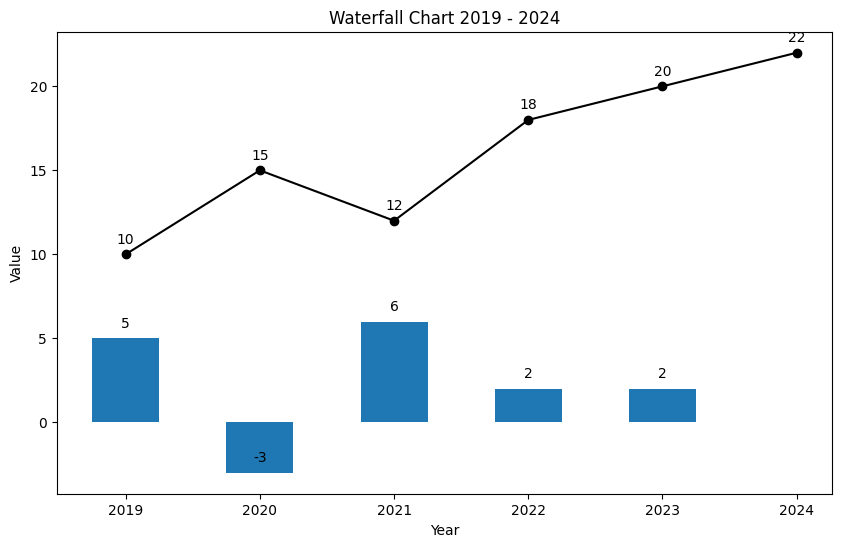

In [ ]:
# prompt: waterfall chart 2019  2024

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
years = [2019, 2020, 2021, 2022, 2023, 2024]
values = [10, 15, 12, 18, 20, 22]  # Example values

# Create the waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate intermediate values for the waterfall chart
changes = [values[i+1] - values[i] for i in range(len(values)-1)]
intermediates = [values[0]] + [sum(changes[:i+1]) + values[0] for i in range(len(changes))]

# Plot the bars
ax.bar(years[:-1], changes, width=0.5)

# Connect the bars with lines
ax.plot(years, values, linestyle='-', marker='o', color='black')

# Customize the plot
ax.set_title('Waterfall Chart 2019 - 2024')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Add value labels to the bars
for i, v in enumerate(changes):
    ax.text(years[i], v + 0.5, str(v), ha='center', va='bottom')

# Add value labels to the connecting lines
for i, v in enumerate(values):
    ax.text(years[i], v + 0.5, str(v), ha='center', va='bottom')


# Show the plot
plt.show()

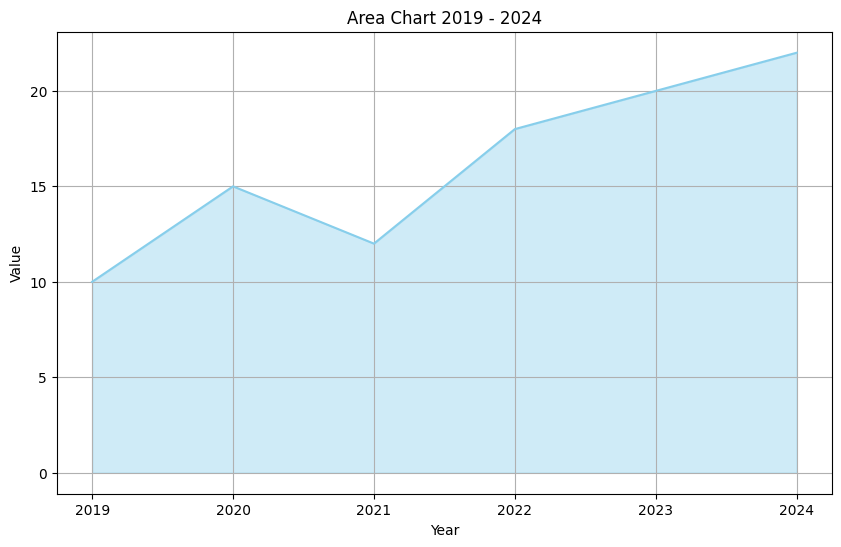

In [ ]:
# prompt: Area chart 2019 - 2024

import matplotlib.pyplot as plt

# Sample data (replace with your actual data from daily_df)
years = [2019, 2020, 2021, 2022, 2023, 2024]
values = [10, 15, 12, 18, 20, 22]  # Example values


# Create the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(years, values, color='skyblue', alpha=0.4)
plt.plot(years, values, color='skyblue')


# Customize the plot
plt.title('Area Chart 2019 - 2024')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)


# Show the plot
plt.show()

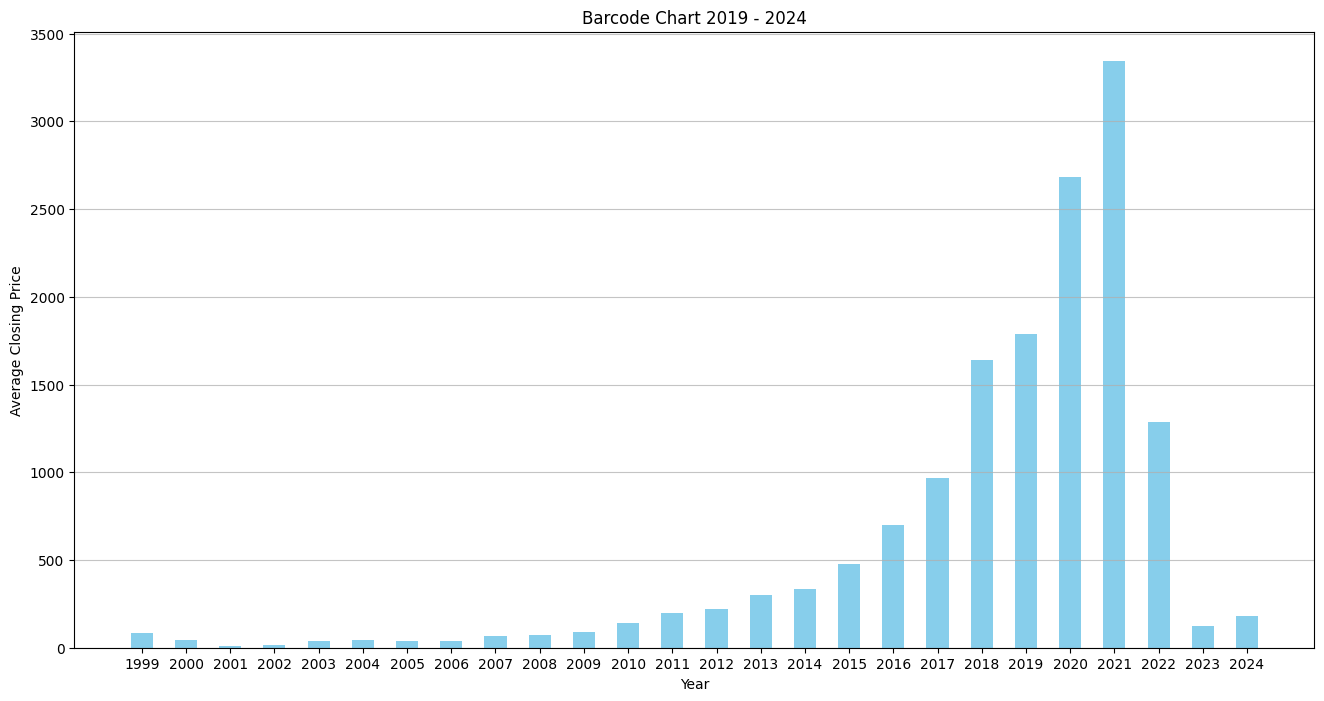

In [ ]:
# prompt: Barcode chart 2019 - 2024

# Assuming daily_df is your DataFrame with a '4. close' column and a DateTimeIndex
# and it's already filtered for the desired date range ('2019-12-01':)

import matplotlib.pyplot as plt

# Sample data (replace with your actual data from daily_df)
# Extract years and closing prices
years = daily_df.index.year.unique()
closing_prices_by_year = {year: daily_df[daily_df.index.year == year]['4. close'] for year in years}
values = [closing_prices_by_year[year].mean() for year in years] # Calculate the average closing price for each year


# Create the barcode chart
fig, ax = plt.subplots(figsize=(16, 8))

# Adjust the bar widths
bar_width = 0.5  # Adjust as needed

# Plot the bars
for i, year in enumerate(years):
    ax.bar(year, values[i], width=bar_width, color='skyblue', label=str(year) if i == 0 else "")


# Customize the plot
ax.set_title('Barcode Chart 2019 - 2024')
ax.set_xlabel('Year')
ax.set_ylabel('Average Closing Price')  # Update y-axis label
ax.set_xticks(years)  # Ensure years are shown as x-axis ticks
ax.grid(axis='y', alpha=0.75)

# Show the legend only once
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[:1], labels[:1]) # only show the first label

plt.show()

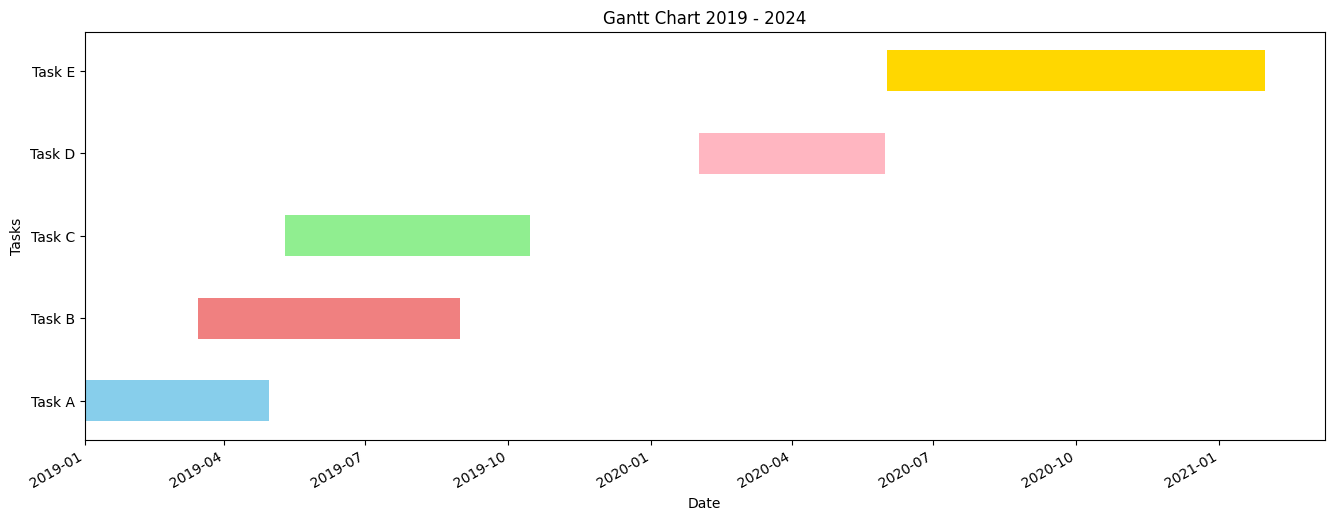

In [ ]:
# prompt: Gantt chart 2019 - 2024

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
tasks = ['Task A', 'Task B', 'Task C', 'Task D', 'Task E']
start_dates = ['2019-01-01', '2019-03-15', '2019-05-10', '2020-02-01', '2020-06-01']
end_dates = ['2019-04-30', '2019-08-31', '2019-10-15', '2020-05-31', '2021-01-31']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'gold']

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(16, 6))

for i, task in enumerate(tasks):
  ax.barh(task, width=(pd.to_datetime(end_dates[i]) - pd.to_datetime(start_dates[i])).days, left=pd.to_datetime(start_dates[i]), height=0.5, color=colors[i])

# Customize the plot
ax.set_title('Gantt Chart 2019 - 2024')
ax.set_xlabel('Date')
ax.set_ylabel('Tasks')
ax.xaxis_date() # Format x-axis to show dates
fig.autofmt_xdate() # Rotate date labels for better readability

# Show the plot
plt.show()

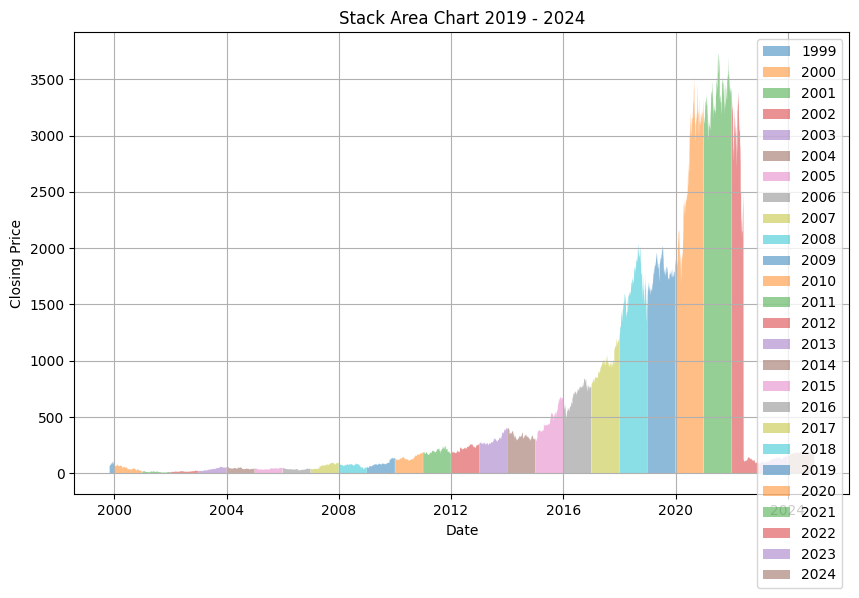

In [ ]:
# prompt: # Stack Area Chart 2019 - 2024

# Assuming daily_df is your DataFrame with a '4. close' column and a DateTimeIndex
# and it's already filtered for the desired date range ('2019-12-01':)

# Sample data (replace with your actual data from daily_df)
# Extract years and closing prices
years = daily_df.index.year.unique()
closing_prices_by_year = {year: daily_df[daily_df.index.year == year]['4. close'] for year in years}

# Create the stack area chart
plt.figure(figsize=(10, 6))

for year in years:
    plt.fill_between(closing_prices_by_year[year].index, closing_prices_by_year[year], label=str(year), alpha=0.5)

# Customize the plot
plt.title('Stack Area Chart 2019 - 2024')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

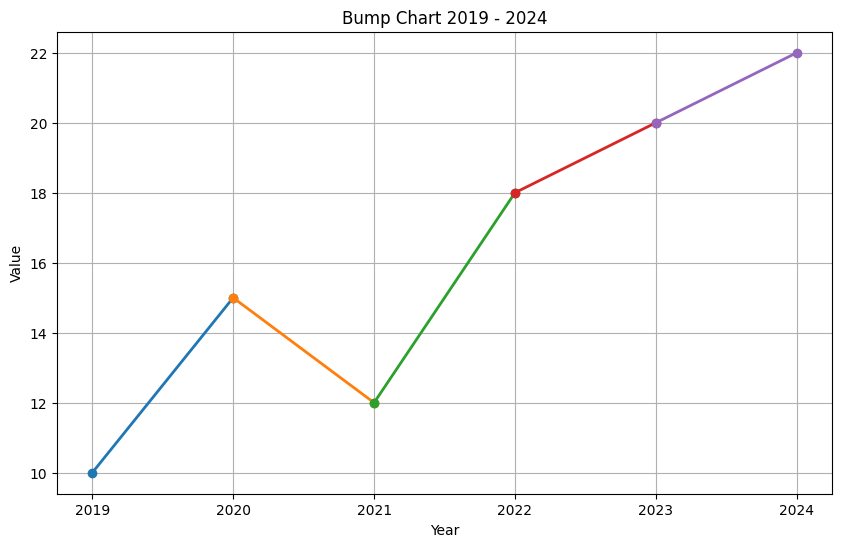

In [ ]:
# prompt: bump chart 2019 - 2024

import matplotlib.pyplot as plt

# Sample data (replace with your actual data from daily_df)
# Assuming you have a DataFrame called 'daily_df' with a '4. close' column
# and a DateTimeIndex, already filtered for the period 2019-2024

# Example data (replace with your actual data)
years = [2019, 2020, 2021, 2022, 2023, 2024]
values = [10, 15, 12, 18, 20, 22] # Example values, replace these with your data

# Create the bump chart
plt.figure(figsize=(10, 6))

for i in range(len(years)):
    if i < len(years)-1:
        plt.plot([years[i],years[i+1]],[values[i],values[i+1]], marker='o', linewidth=2)

plt.title('Bump Chart 2019 - 2024')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

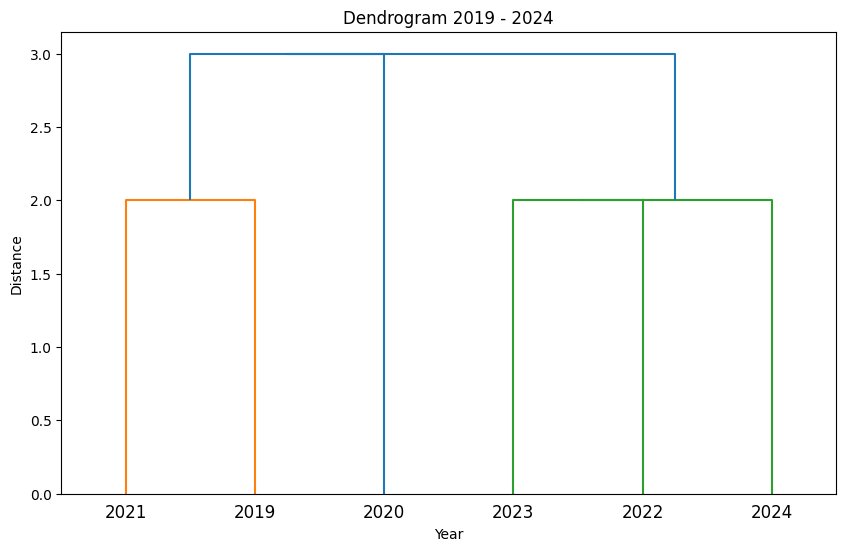

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Sample data (replace with your actual data from daily_df)
years = ['2019', '2020', '2021', '2022', '2023', '2024']
values = [10, 15, 12, 18, 20, 22]  # Example values

# Reshape the values array to be 2D (each value is in its own list)
values_reshaped = np.array(values).reshape(-1, 1)

# Calculate the linkage matrix
linked = linkage(values_reshaped, 'single')  # You can change the linkage method

# Create the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=years,
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrogram 2019 - 2024')
plt.xlabel('Year')
plt.ylabel('Distance')
plt.show()


In [ ]:
# prompt: scatter chart 2019 - 2024

# Assuming daily_df is your DataFrame with a '4. close' column and a DateTimeIndex
# and it's already filtered for the desired date range ('2019-12-01':)

# Sample data (replace with your actual data from daily_df)
# Extract years and closing prices
years = daily_df.index.year.unique()
closing_prices_by_year = {year: daily_df[daily_df.index.year == year]['4. close'] for year in years}

# Create the scatter chart
plt.figure(figsize=(10, 6))

for year in years:
    plt.scatter(closing_prices_by_year[year].index, closing_prices_by_year[year], label=str(year), alpha=0.7)


# Customize the plot
plt.title('Scatter Chart of Closing Prices 2019 - 2024')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

NameError: name 'daily_df' is not defined